# **1. Predicting House Sale Price in King County in 2015**

It is currently the year **2015**. Lucas, a longtime resident of Singapore, has recently received a job offer in Bellevue, Washington. This has prompted him to plan a move to King County with his entire family.

Unfamiliar with the U.S. housing market due to his limited travel outside of Asia, Lucas is seeking guidance from us, data analysts, to give him useful suggestions and recommendations in buying a suitable house in King County at a reasonable price.

> ***OUR AIM:***    
*To provide Lucas with valuable insights into King County's housing market. We will achieve this through `exploratory data analysis (EDA)` of a relevant King County housing dataset. Additionally, we will leverage various `machine learning models` by training and tuning them to predict house sale prices based on Lucas' specific requirements.*

---

**Import Essential Libraries**

In [39]:
# libraries used for visualizations and cleaning of data
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import plotly.express as px
from IPython.display import Image
sb.set()

# libraries used to train and evaluate different regression models
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, scale
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

# to ignore warnings
import warnings
warnings.filterwarnings("ignore")


In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


---
**Data Information**

The `kc_house_data` dataset was obtained from kaggle from the following link: https://www.kaggle.com/datasets/harlfoxem/housesalesprediction/data

This dataset contains house sale prices in King County, particularly houses sold from May 2014 to May 2015. It contains information on the houses sold such as the number of bedrooms, bathrooms, year it was built, year it was renovated etc.

In [41]:
rawData = pd.read_csv("/content/drive/MyDrive/kc_house_data.csv")
rawData.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


---
**Data Description:**

> `id`:  Unique ID per house sale   
`date`: Date of the house sale   
`price`: Price of house sale in USD   
`bedrooms`: Number of bedrooms    
`bathrooms`: Number of bathrooms   
`sqft_living`: Square footage of the apartments interior living space   
`sqft_lot`: Square footage of the land space   
`floors`: Number of floors   
`waterfront`: An index to indicate if the house was overloofing the waterfront or not *(0 represents no waterfront, 1 represents with waterfront)*   
`view`: An index from 0 to 4 indicating of how good the view of the property was *(0 represents no good view, 4 represents very good view)*   
`condition`: An index from 1 to 5 on the condition of the house *(1 represents very poor condition, 5 represents very good condition)*   
`grade`: An index from 1 to 13 on the construction of the property *(1 to 3 falls short of building construction and design, 7 has an average level of construction and design, and 11 to 13 have higher quality level of construction and design)*   
`sqft_above`: The square footage of the interior housing space that is above the ground level   
`sqft_basement`: The square footage of the interior housing space that is below the ground level   
`yr_built`: The year of house built   
`yr_renovated`: The year of the house’s last renovation   
`zipcode`: The zipcode is the postal code to indicate the area the house is in   
`lat`: Latitude   
`long`:	Longitude   
`sqft_living15`: The average square footage of interior housing living space for the nearest 15 neighboring houses   
`sqft_lot 15`: The average square footage of land space for the nearest 15 neighboring houses



In [42]:
print('Shape of original dataset: ', rawData.shape)

Shape of original dataset:  (21613, 21)


---
# **2. Exploratory Data Analysis**

To gain some general insights from the original King County dataset, we will be plotting various charts and analyse the outputs.



### **2.1. Line Charts**


#### **2.1.1. Trend of Average House Sale Price in King County Based On** ***Year Built***

According to `Investopedia`, **building age** is one of the common factors that affects house price. Hence, in order to find out how house sale prices changes based on when it was built, the line chart below was built. This chart shows the trend of average house sale price against year it was built.

Link: https://www.investopedia.com/articles/mortages-real-estate/11/factors-affecting-real-estate-market.asp




In [43]:
#prepare the average prices column for year built
average_prices = rawData.groupby('yr_built')['price'].mean().reset_index()
average_prices

,yr_built,price
0,1900,581387.206897
1,1901,556935.931034
2,1902,673007.407407
3,1903,480958.195652
4,1904,583756.644444
...,...,...
111,2011,544522.000000
112,2012,527447.335294
113,2013,678545.452736
114,2014,683681.754919


In [44]:
fig = px.line(average_prices, x="yr_built", y="price")

# Define custom hover template
hover_template = "Year Built: %{x}<br>" \
                 "Avg. House Sale Price: %{y:.2f}k"

# Update layout
layout = dict(
    title='<b>Trend of Average House Sale Price in King County Based on Year It Was Built (1900-2015)\n</b>',
    xaxis=dict(
        title='<b>Year Built</b>',  # Wrap title in <b> tags for bold
        titlefont=dict(size=12)  # Set font size
    ),
    yaxis=dict(
        title='<b>Average Price</b>',  # Wrap title in <b> tags for bold
        titlefont=dict(size=12)  # Set font size
    ),
    title_x=0.5,  # Center-align the title horizontally
    title_y=0.95,   # Position the title closer to the top
)

# Update figure with custom hover template and layout
fig.update_traces(hovertemplate=hover_template)
fig.update_layout(layout)

# Divide the house price by 1000 to display in thousands
fig.data[0].update(y=fig.data[0].y / 1000)

fig.show()


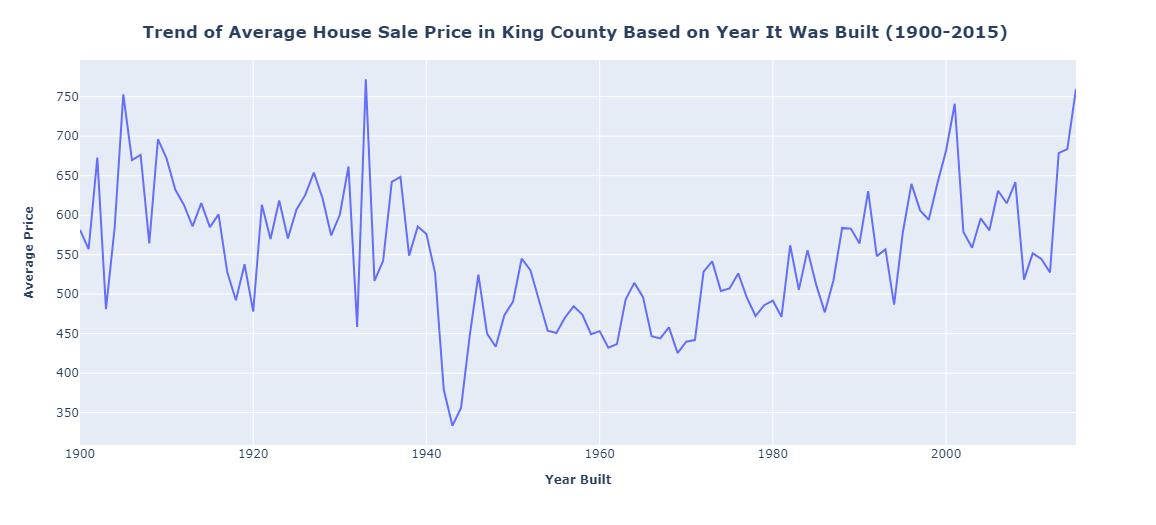

In [1]:
# to show plotly graph in github
Image(filename='PriceByYrBuilt.png') 

The above chart shows that houses that are **very old or very new** are generally **more expensive** ranging from 580k to 760k. Houses built from 1940 to 1982 seem to be comparatively cheaper ranging from 330k to 560k.

#### **2.1.2. Trend of Average House Sale Price in King County Based On** ***Month Sold***

We wanted to learn if there was **a specific season or a period of time** where house sale price might be cheaper. Hence, the below line chart was done to see how the house sale prices change based on the months they were built.

In [45]:
# prepare average price for each month df
df=rawData.copy()
df['date'] = df['date'].astype('datetime64[ns]')
df['month'] = df['date'].apply(lambda x: x.month)
avg_price_month = df.groupby('month')['price'].mean().reset_index()
avg_price_month

,month,price
0,1,525870.889571
1,2,507851.371200
2,3,543977.187200
3,4,561837.774989
4,5,550768.785833
5,6,558002.199541
6,7,544788.764360
7,8,536445.276804
8,9,529253.821871
9,10,539026.971778


In [46]:
fig = px.line(avg_price_month, x="month", y="price")

# Define custom hover template
hover_template = "Month: %{x}<br>" \
                 "Avg. House Sale Price: %{y:.2f}k"

# Update layout
layout = dict(
    title='<b>Trend of Average House Sale Price in King County Based on Month It Was Sold\n</b>',
    xaxis=dict(
        title='<b>Month</b>',  # Wrap title in <b> tags for bold
        titlefont=dict(size=12),  # Set font size
        tickvals=list(range(1, 13)),  # Set tick values to represent months from 1 to 12
        ticktext=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],  # Set tick text for abbreviated month names
    ),
    yaxis=dict(
        title='<b>Average Price</b>',  # Wrap title in <b> tags for bold
        titlefont=dict(size=12)  # Set font size
    ),
    title_x=0.5,  # Center-align the title horizontally
    title_y=0.95,   # Position the title closer to the top
)

# Update figure with custom hover template and layout
fig.update_traces(hovertemplate=hover_template, mode='lines+markers')
fig.update_layout(layout)

# Divide the house price by 1000 to display in thousands
fig.data[0].update(y=fig.data[0].y / 1000)

fig.show()


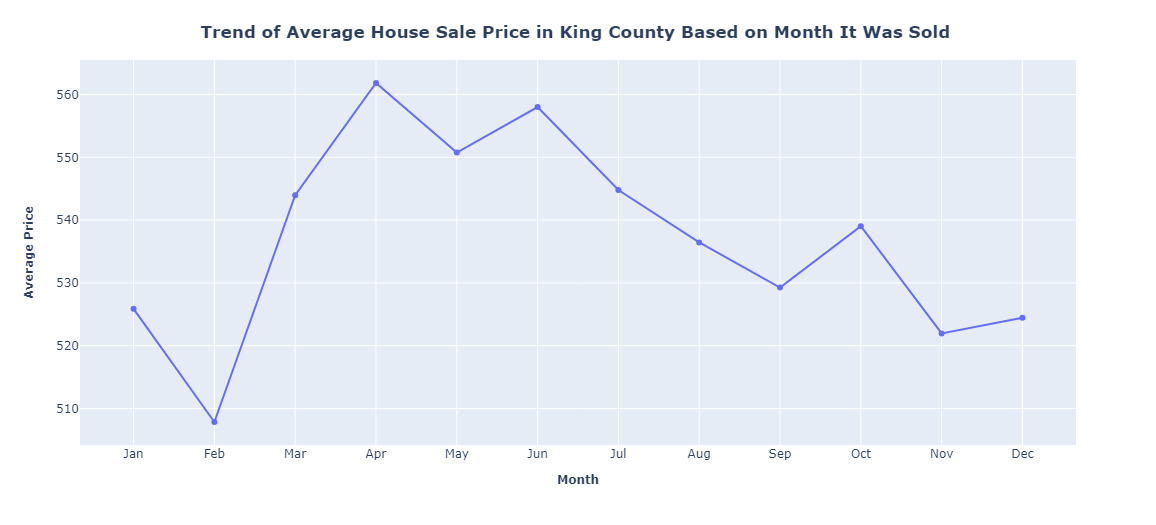

In [2]:
# to show plotly graph in github
Image(filename='PriceByMthSold.png') 

Based on the line chart above, late winter and early summer period spanning from **March to July** generally have **more expensive house** sale prices ranging from 543k to 560k. For **cheaper options** ranging from 507k to 540k, buying houses during winter from months **September to February** could be considered.

### **2.2. Correlation Heatmap**

#### **Linear Relationship between Sale Price and Different Measures of Houses in King County**

According to the same `Investopedia` article, **house size** was also one of the essential factors that affects house price. Hence, in order to find out more about the relationship between house sale prices and different measurements of houses in King County, the following correlation heatmap was done.

Link: https://www.investopedia.com/articles/mortages-real-estate/11/factors-affecting-real-estate-market.asp


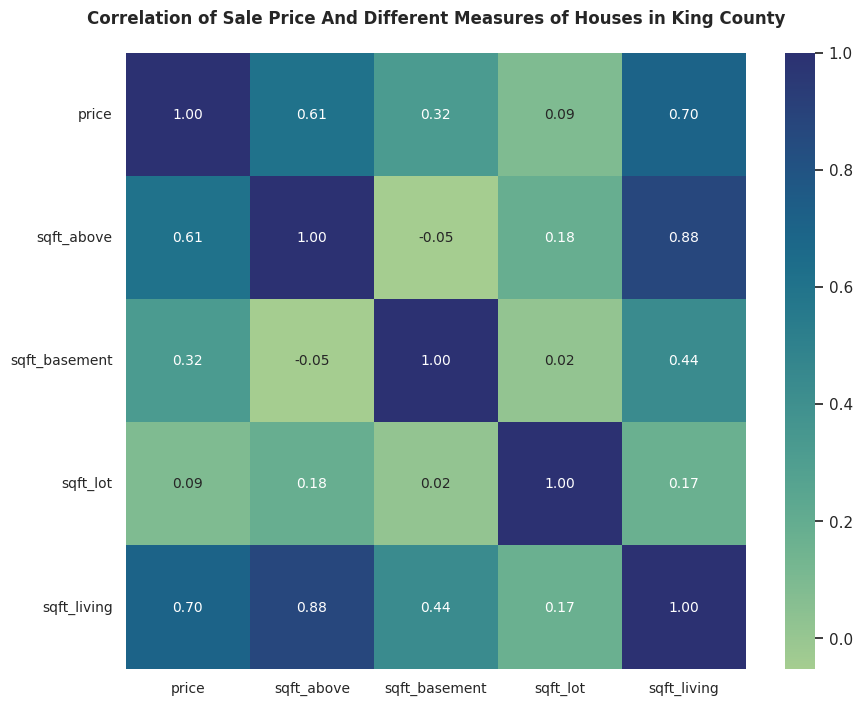

In [47]:
# Constructing the correlation matrix
colOfInterest = rawData[["price", "sqft_above", "sqft_basement", "sqft_lot","sqft_living"]]
correlation_matrix = colOfInterest.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))  # Adjust the figure size if necessary
sb.heatmap(correlation_matrix, annot=True, cmap='crest', fmt=".2f", annot_kws={"fontsize":10})
plt.title('Correlation of Sale Price And Different Measures of Houses in King County\n', fontweight='bold', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(rotation=0,fontsize=10)
plt.show()

All the different measurements seem to generally have **high positive linear relationship** with house sale price. `sqft_living` which is the size of living space is the most correlated with a value of 0.70, followed by `sqft_above` which is the size of living space above ground level with a correlation value of 0.61. This is as expected since house prices generally increase with house size.

Although not as highly correlated as the above two, `sqft_basement`, which is the basement size, and `sqft_lot`, which is the size of land space, are also somewhat positively correlated with a value of 0.32 and 0.09 respectively.

### **2.3. Histogram**

#### **Distribution of House Sale Price in King County**

It is essential to know the **range of house sale prices** in King County so as to make more informed decisions in buying a suitable house. Therefore, the following histogram was done to see the distribution of house sale prices in King County.

In [48]:
import plotly.express as px

# Create histogram
fig = px.histogram(rawData, x="price", nbins=80)

# Define custom hover template
hover_template = "House Sale Price Range: %{x}<br>" \
                 "Avg. House Count: %{y:.0f}k"

# Update layout
layout = dict(
    title='<b>Distribution of House Sale Price in King County\n</b>',
    xaxis=dict(
        title='<b>House Sale Price</b>',  # Wrap title in <b> tags for bold
        titlefont=dict(size=12)  # Set font size
    ),
    yaxis=dict(
        title='<b>Count</b>',  # Wrap title in <b> tags for bold
        titlefont=dict(size=12)  # Set font size
    ),
    title_x=0.5,  # Center-align the title horizontally
    title_y=0.95,   # Position the title closer to the top
    bargap=0.1,  # Adjust the gap between bars
    bargroupgap=0.1,  # Adjust the gap between groups of bars
    barmode="overlay"
)

# Update figure with custom hover template and layout
fig.update_traces(hovertemplate=hover_template,marker_color='purple', opacity=0.7, selector=dict(type='histogram'))
fig.update_layout(layout)

# Show plot
fig.show()


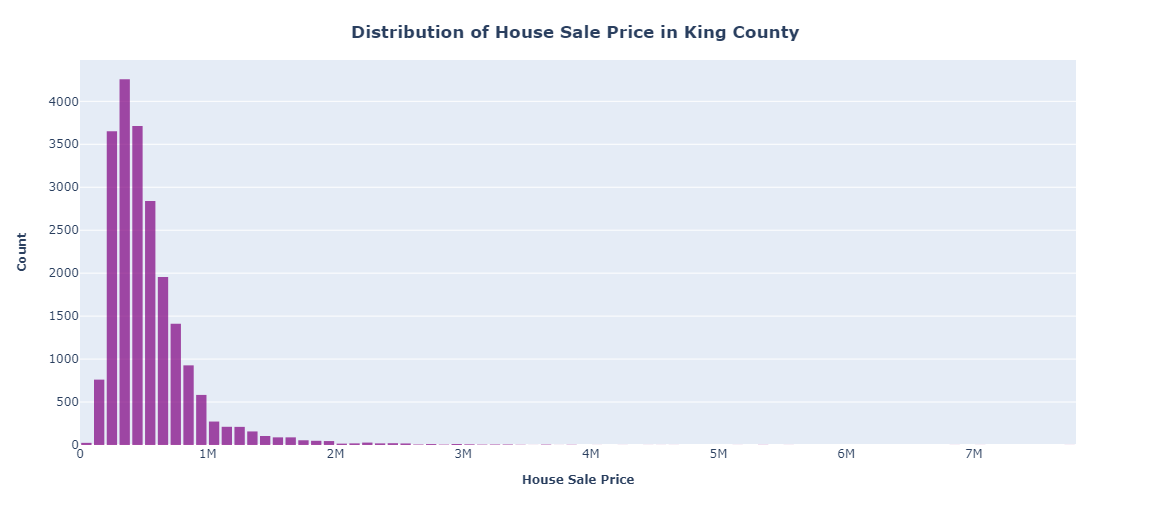

In [3]:
# to show plotly graph in github
Image(filename='DistrOfPrice.png') 

The distribution of house sale prices in King County is **positively skewed** based on the histogram chart above. This suggests that although there may be a few instances where sale price ranged above 7M, generally most houses are sold at prices **ranging from 100k to 1.3M**. Most frequently, houses were sold at prices ranging from 300k to 400k.


### **2.4. Scatter Map**

#### **General Trend of House Sale Price Across Various Parts of King County**

Since Lucas and family are new to U.S. and are not very familiar with the different locations in King County, our team thought that gaining knowledge on how the **house sale price varies across different locations** in King County might be useful. Hence, the following scatter map was done to obtain a clear visualization of the changing house sale prices in different parts of King County.

However, from the histogram earlier, we noticed that the outliers might hinder us from viewing the **general trend** of house prices in different parts of King County. Thus, the outliers were first removed before plotting the chart.

In [49]:
#removing outliers to display change in sale price of houses generally
df2=rawData[['price', 'long', 'lat']]

Q1 = df2.quantile(0.25)
Q3 = df2.quantile(0.75)
IQR = Q3 - Q1

print(df2.shape)
df_out = df2[~((df2 < (Q1 - (1.5 * IQR))) | (df2 > (Q3 + (1.5 * IQR)))).any(axis=1)]
print(df_out.shape)

(21613, 3)
(20213, 3)


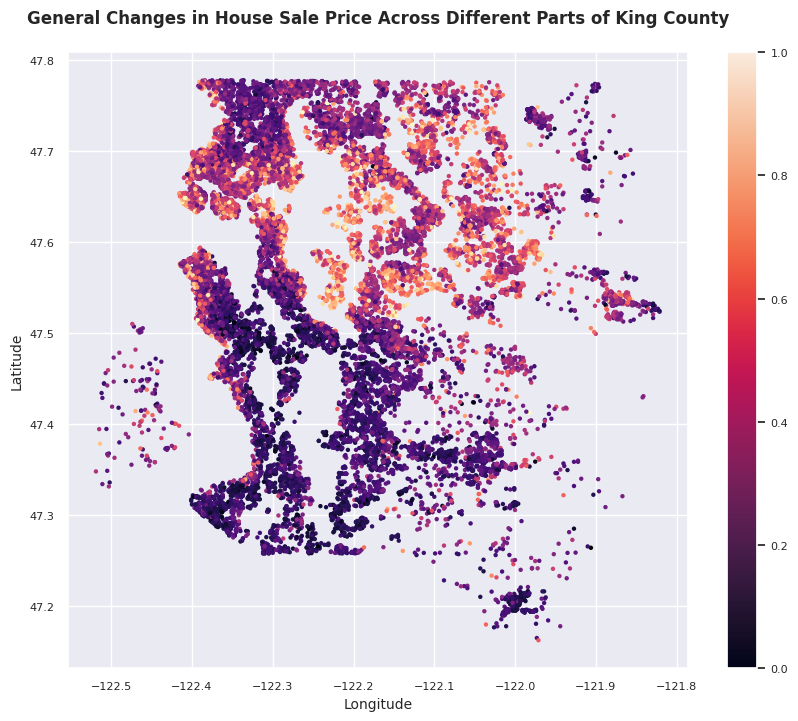

In [50]:
plt.figure(figsize=(10, 8))

# Create scatter plot
scatter = sb.scatterplot(x='long', y='lat', data=df_out, hue='price', palette='magma', legend=False, s=10, edgecolor='none')

# Adjust color bar
cbar = plt.colorbar(scatter.collections[0])
cbar.ax.tick_params(labelsize=8)

plt.xlabel('Longitude', fontsize=10)
plt.ylabel('Latitude', fontsize=10)
plt.title('General Changes in House Sale Price Across Different Parts of King County\n', fontsize=12, fontweight='bold')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.show()


When comparing the geographical map of King County with the above chart, the **South** part of King County seem to generally have **cheaper** houses while the **East** part comparatively has **more expensive** houses. Therefore, Lucas could consider buying houses in the Southern area where house sale prices are relatively cheaper.